## LAB5

In [263]:
# Cho tập dữ liệu winequality-read.csv dataset
#1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Đọc dữ liệu
df = pd.read_csv('winequality-red.csv',delimiter=';')
# Hiển thị 5 dòng đầu tiên
print(df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [264]:
# Thông tin về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [265]:
# Thống kê mô tả
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [266]:
#2. Phân tích khám phá dữ liệu
#2.1 kiểm tra giá trị thiếu
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


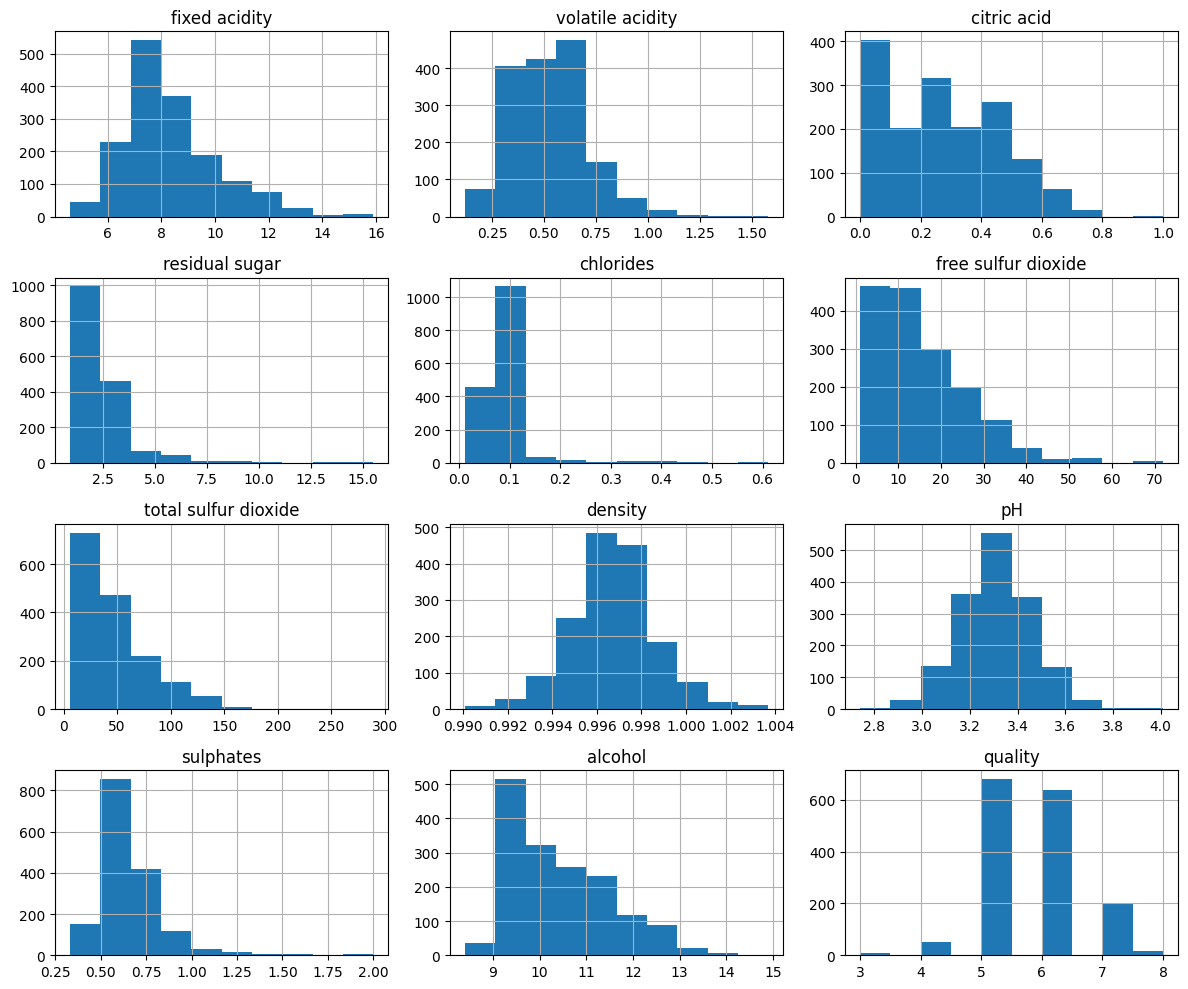

In [267]:
#2.2 vẽ histogram cho tất cả các biến và nhận xét
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()
# Nhận xét
# - Biến pH và density có phân phối chuẩn


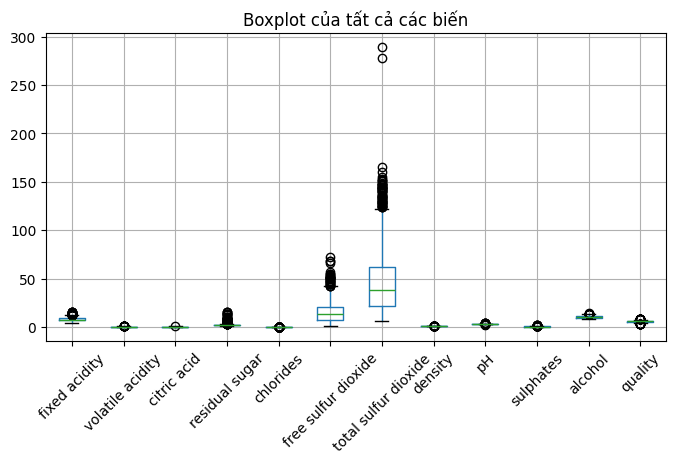

In [268]:
#2.3 vẽ biểu đồ boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(8, 4))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot của tất cả các biến')
plt.show()


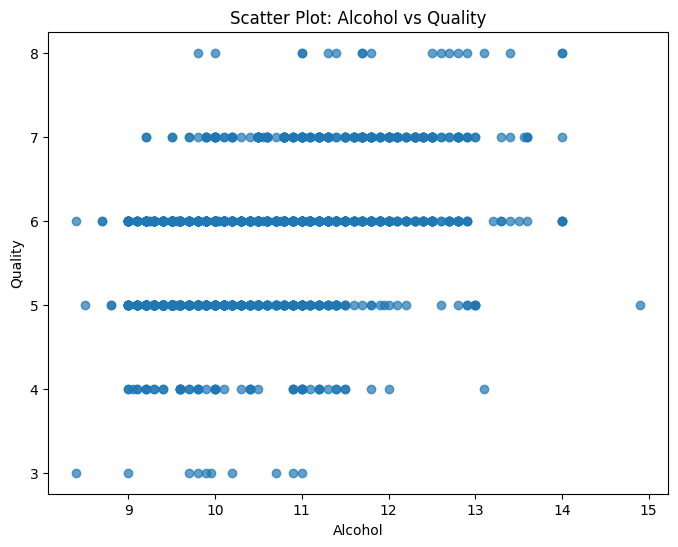

In [269]:
#2.4 vẽ scatter plot cho "alocoho" và "quality"
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['quality'], alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatter Plot: Alcohol vs Quality')
plt.show()



Ma trận tương quan:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide 

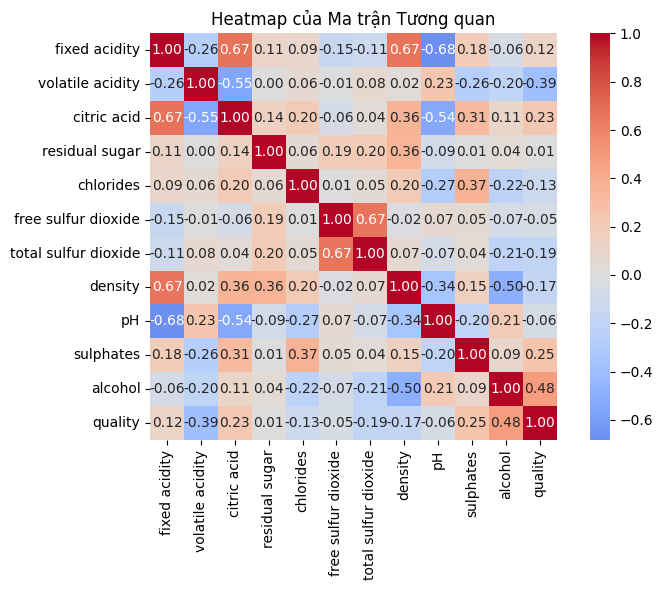

In [270]:
#3. Tính toán ma trận tương quan và vẽ biểu đồ heatmap của ma trận tương quan đó
correlation_matrix = df.corr()

# In ma trận tương quan (tùy chọn)
print("Ma trận tương quan:")
print(correlation_matrix)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,  # Hiển thị giá trị trên heatmap
            cmap='coolwarm',  # Màu sắc từ lạnh (xanh) đến nóng (đỏ)
            center=0,  # Đặt giá trị 0 ở giữa để phân biệt tương quan âm/dương
            fmt='.2f',  # Định dạng số thập phân với 2 chữ số
            square=True)  # Đảm bảo ô vuông
plt.title('Heatmap của Ma trận Tương quan')
plt.tight_layout()
plt.show()


In [271]:
# 4. chia dữ liệu thủ công không dùng thư viện có sẵn
print(df.shape)
# 4.1 Xáo trộn dữ liệu
# Xáo trộn dữ liệu
data = df.values

# 4.1 Xáo trộn dữ liệu dùng permutation
np.random.seed(42)  # Đặt seed để kết quả có thể tái hiện
indices = np.random.permutation(len(data))  # Tạo một mảng chỉ số ngẫu nhiên
shuffled_data = data[indices]  # Sắp xếp lại dữ liệu theo chỉ số ngẫu nhiên


(1599, 12)


In [272]:
# 4.2 Chia dữ liệu: 80% huấn luyện, 20% kiểm tra
total_samples = len(shuffled_data)
train_size = int(0.8 * total_samples)  # 80% cho huấn luyện
test_size = total_samples - train_size  # 20% cho kiểm tra

In [273]:
#4.3 tách dữ liệu
train_data = shuffled_data[:train_size]
test_data = shuffled_data[train_size:]

In [274]:
# 4.4 Tách đặc trưng và nhãn
# Giả sử cột cuối cùng là 'quality' (nhãn), các cột còn lại là đặc trưng
X_train = train_data[:, :-1]  # Tất cả cột trừ cột cuối
y_train = train_data[:, -1]   # Cột cuối
X_test = test_data[:, :-1]    # Tất cả cột trừ cột cuối
y_test = test_data[:, -1]     # Cột cuối

In [275]:
# Kiểm tra kích thước
print(f"Tổng số mẫu: {total_samples}")
print(f"Kích thước tập huấn luyện: {X_train.shape[0]} mẫu, {X_train.shape[1]} đặc trưng")
print(f"Kích thước tập kiểm tra: {X_test.shape[0]} mẫu, {X_test.shape[1]} đặc trưng")
print(f"Kích thước nhãn huấn luyện: {len(y_train)}")
print(f"Kích thước nhãn kiểm tra: {len(y_test)}")

Tổng số mẫu: 1599
Kích thước tập huấn luyện: 1279 mẫu, 11 đặc trưng
Kích thước tập kiểm tra: 320 mẫu, 11 đặc trưng
Kích thước nhãn huấn luyện: 1279
Kích thước nhãn kiểm tra: 320


In [276]:
#5. Chuẩn bị dữ liệu
#5.1 khởi tạo bộ dữ liệu chuẩn hóa
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [277]:
# 5.2 Chuẩn hóa tập huấn luyện
X_train_normalized = scaler.fit_transform(X_train)

In [278]:
# 5.3 Chuẩn hóa tập kiểm tra
X_test_normalized = scaler.transform(X_test)

In [279]:

#6. Ứng dụng mô hình hồi quy tuyến tính
#6.1 khởi tạo mô hình
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#6.2 huấn luyện mô hình
model.fit(X_train_normalized, y_train)
# 6.3 Đánh giá mô hình
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.01146112 -0.17163857 -0.01650714  0.01384457 -0.09258509  0.05131906
 -0.12048499 -0.03329115 -0.10230694  0.16257996  0.28744979]
Intercept: 5.63565285379204


In [280]:
# 6.4 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_normalized)
print("Predictions:", y_pred)

Predictions: [6.05848455 5.5490091  5.3496577  5.42258039 5.88654498 5.80860231
 6.2372499  5.68250608 5.54588515 6.05591423 5.42657825 5.56140581
 5.79361235 5.40753322 6.0955014  5.35926577 5.66583513 6.3678573
 5.25827583 4.97734456 6.6476064  5.79070285 5.94733943 6.24722512
 5.17708127 5.85118564 5.94925218 5.0493944  5.06988878 6.03374223
 5.72994321 6.7071302  5.22706743 5.8833526  6.33099304 5.22360913
 5.46202077 6.34901707 6.27309794 5.72813487 5.89361752 5.07026253
 6.33585059 5.88654498 5.90766297 5.29734881 5.96868303 5.62614343
 5.10737807 5.00101202 6.34544835 6.18143496 5.00481429 5.33591846
 5.84442459 5.7864948  6.00778817 5.44698913 4.9461761  5.74033579
 6.58583973 5.57087106 5.51625395 5.92332714 6.33339968 5.39887117
 5.54725966 5.50548676 5.62582725 5.744059   5.98429985 5.2742779
 5.40511986 5.05073382 5.39778383 6.28171785 6.16671682 5.41001977
 5.75136425 4.98965143 5.70372758 6.1140404  5.06727263 5.42840867
 4.8351441  5.6048943  5.20916557 6.15430442 6.0979

In [281]:
#7. Đánh giá mô hình
# tính mse, r^2
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Tính R^2 score
r2_score = model.score(X_test_normalized, y_test)
print("R^2 score:", r2_score)

Mean Squared Error: 0.35008178598506506
R^2 score: 0.4223966408083484


In [282]:
# BTVN:
# 1. hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác
# 2. cho bộ dữ liệu sau : how long we live trong zalo
df = pd.read_csv('howlongwelive.csv')
# 2.1 Tôi muốn biết có bao nhiêu cột và bao nhiêu hàng
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

Số hàng: 2938, Số cột: 22


In [283]:
# 2.2 Tôi muốn biết danh sách của các cột
columns_list = df.columns.tolist()
print(f"Danh sách các cột: {columns_list}")

Danh sách các cột: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [284]:
# 2.3 Thử dùng df["status"]
print(df["Status"].head())


0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object


In [285]:
# 2.4 cho tôi biết có bao nhiêu nước đang phát triển và các nước phát triển
developing_count = df[df['Status'] == 'Developing'].shape[0]
developed_count = df[df['Status'] == 'Developed'].shape[0]
print(f"Số nước đang phát triển: {developing_count}")
print(f"Số nước phát triển: {developed_count}")

Số nước đang phát triển: 2426
Số nước phát triển: 512


In [286]:
# 2.5 Tính min, max, mean, median của alcohol
alcohol_min = df['Alcohol'].min()
alcohol_max = df['Alcohol'].max()
alcohol_mean = df['Alcohol'].mean()
alcohol_median = df['Alcohol'].median()
print(f"Alcohol - Min: {alcohol_min:.2f}, Max: {alcohol_max:.2f}, Mean: {alcohol_mean:.2f}, Median: {alcohol_median:.2f}")

Alcohol - Min: 0.01, Max: 17.87, Mean: 4.60, Median: 3.75


In [287]:
# 2.6
# - Bài 1: đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê những quốc gia độc đáo này
above_avg_alcohol = df[df['Alcohol'] > alcohol_mean]
unique_countries_above_avg = above_avg_alcohol['Country'].unique()
count_above_avg = above_avg_alcohol.shape[0]
print(f"Số hàng có rượu > trung bình: {count_above_avg}")
print(f"Các quốc gia độc đáo: {list(unique_countries_above_avg)}")

Số hàng có rượu > trung bình: 1171
Các quốc gia độc đáo: ['Albania', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', "Lao People's Democratic Republic", 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Gr

In [288]:
# - Bài 2: Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
Schooling_mean = df['Schooling'].mean()
gdp_mean = df['GDP'].mean()
above_avg_both = df[(df['Schooling'] > Schooling_mean) & (df['GDP'] > gdp_mean)]
countries_above_avg_both = above_avg_both['Country'].tolist()
print(f"Quốc gia có Schooling > {Schooling_mean:.2f} và GDP > {gdp_mean:.2f}:")
print(countries_above_avg_both)

Quốc gia có Schooling > 11.99 và GDP > 7483.16:
['Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Azerbaijan', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Belarus', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Botswana', 'Botswan